# Importing Libraries

In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Loading Dataset & Preprocessing

In [2]:
DIR = r"D:\dataset"
Category = ['Mask','NoMask']

In [3]:
size = 128
data = []
for category in Category:
    folder = os.path.join(DIR,category)
    label = Category.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(size,size))
        data.append([img_arr,label])

In [4]:
random.shuffle(data)

In [5]:
X = []
Y = []
for features, labels in data:
    X.append(features)
    Y.append(labels)

In [6]:
data = []
for item in X:
    k = cv2.cvtColor(item,cv2.COLOR_BGR2GRAY)
    data.append(k)

In [7]:
X = data

In [8]:
X = np.array(X)
X.shape

(10000, 128, 128)

In [9]:
len(Y)

10000

In [10]:
Y

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [11]:
x = X
y = np.array(Y)

In [12]:
x = x/255

In [13]:
x.shape

(10000, 128, 128)

In [14]:
x_trainr=np.array(x).reshape(-1,size,size,1)
print("Training sample Dimension : ",x_trainr.shape)


Training sample Dimension :  (10000, 128, 128, 1)


In [15]:
x_trainr

array([[[[0.17647059],
         [0.17647059],
         [0.17647059],
         ...,
         [0.36862745],
         [0.46666667],
         [0.46666667]],

        [[0.17647059],
         [0.17647059],
         [0.17647059],
         ...,
         [0.39607843],
         [0.46666667],
         [0.46666667]],

        [[0.17254902],
         [0.17647059],
         [0.17647059],
         ...,
         [0.43137255],
         [0.46666667],
         [0.46666667]],

        ...,

        [[0.50588235],
         [0.50588235],
         [0.50588235],
         ...,
         [0.02352941],
         [0.02352941],
         [0.02352941]],

        [[0.50588235],
         [0.50588235],
         [0.50588235],
         ...,
         [0.02352941],
         [0.02352941],
         [0.02352941]],

        [[0.50588235],
         [0.50588235],
         [0.50588235],
         ...,
         [0.16078431],
         [0.14509804],
         [0.11764706]]],


       [[[0.12156863],
         [0.12156863],
         [0.15

# -----------------------

# -----------------------------

# CNN Model

In [16]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

# Training Model

In [ ]:
model.fit(x_trainr,y,batch_size=20,epochs=13,validation_split=0.2)

Epoch 1/13
 55/400 [===>..........................] - ETA: 5:00 - loss: 0.4567 - accuracy: 0.8600

# -----------------------------

# Testing Model on Images

In [25]:
DIR = r"D:\mydataset"
Category = ['Mask','NoMask']

In [215]:
size = 128
test = []
for category in Category:
    folder = os.path.join(DIR,category)
    label = Category.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(size,size))
        test.append([img_arr,label])

In [27]:
#random.shuffle(test)

In [28]:
Xt = []
Yt = []
for features, labels in test:
    Xt.append(features)
    Yt.append(labels)

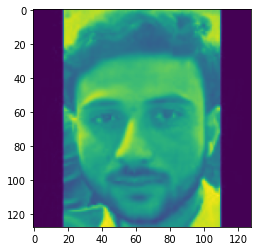

In [217]:
plt.imshow(Xt[12])

In [218]:
dataTest = []
for item in Xt:
    d = cv2.cvtColor(item,cv2.COLOR_BGR2GRAY)
    dataTest.append(d)

error: OpenCV(4.5.4) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x694991f6::Set<1,-1,-1>,struct cv::impl::A0x694991f6::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
Xt = np.array(dataTest)
Xt.shape

In [32]:
test=np.array(Xt).reshape(-1,size,size,1)
test.shape

(16, 128, 128, 1)

In [33]:
print("Test --> ",test.shape)
print("x_trainr --->",x_trainr.shape)

Test -->  (16, 128, 128, 1)
x_trainr ---> (10000, 128, 128, 1)


In [34]:
test = test/255

In [35]:
predictions=model.predict(test)

Mask Detected


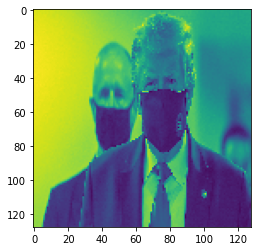

In [114]:
index = 3
out = np.argmax(predictions[index])
if out == 1:
    print("No Mask Detected")
    plt.imshow(test[index])
else:
    print("Mask Detected")
    plt.imshow(test[index])

# ------------

# MTCNN for Face detection

In [41]:
import cv2
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

In [42]:
mask_label = {0:'MASK', 1:'NO MASK'}
color_label = {0:(0,0,255), 1:(255,0,0)} #rgb color codes

In [273]:
img_path = 'D:\\mydataset\\NoMask\\ww.jpeg'

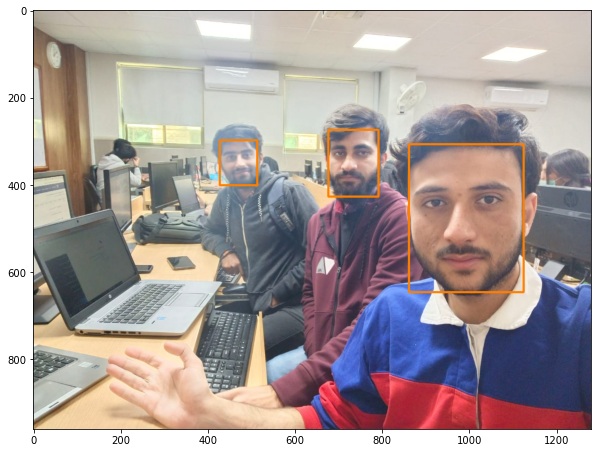

In [274]:
image = cv2.imread(img_path)
out_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # input MTCNN is RGB
detections = detector.detect_faces(out_image) # result
faces = [] # list of faces
# draw faces on image
for face in detections:
    faces.append(face['box'])
    x, y, w, h = face['box']
    cv2.rectangle(out_image, (x, y), (x+w, y+h), (255, 128, 0), 4)
# convert list to ndarray
faces = np.array(faces)
plt.figure(figsize=(10, 10))
plt.imshow(out_image)
plt.show()

In [275]:
TARGET_SIZE = (128, 128)

new_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #colored output image
classes = []


In [276]:
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = new_img[y:y+h,x:x+w]
    crop = cv2.resize(crop,TARGET_SIZE,TARGET_SIZE)
    crop = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)
    crop = np.reshape(crop,[1,128,128,1])/255.0

    mask_result = model.predict(crop)
    classes.append(mask_result.argmax())
    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,color_label[mask_result.argmax()],2)
    cv2.rectangle(new_img,(x,y),(x+w,y+h),color_label[mask_result.argmax()],1)


[0, 0, 1]


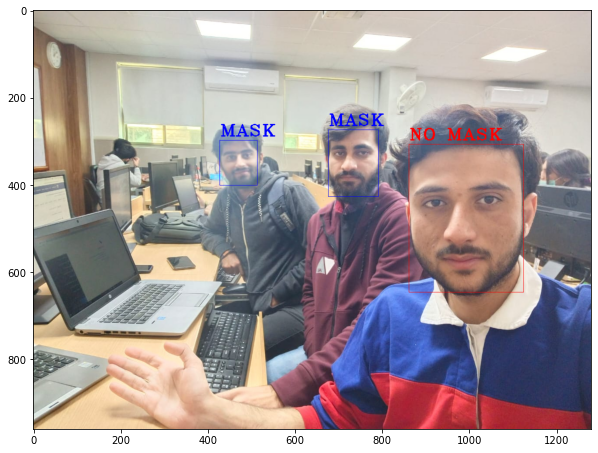

In [277]:
print(classes)
plt.figure(figsize=(10,10))
plt.imshow(new_img)

# Accessing Camera

In [260]:
# Camera
camera = cv2.VideoCapture(0)
camera.set(10,200)



while camera.isOpened():
    ret, frame = camera.read()
    #frame = cv2.bilateralFilter(frame, 5, 50, 100)  # smoothening filter
    frame = cv2.flip(frame, 1)  # flip the frame horizontally
    #cv2.rectangle(frame, (int(x * frame.shape[1]), 0),
                 #(frame.shape[1], int(y * frame.shape[0])), (255, 0, 0), 2) #drawing ROI
    cv2.imshow('original', frame)

    k = cv2.waitKey(10)
    if k == ord('e'):  # press 'e' to capture the background
        camera.release()
        cv2.destroyAllWindows()
        break

In [261]:
frame.shape

(480, 640, 3)

In [262]:
framee = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
framee.shape

(480, 640)

In [263]:
mask_label = {0:'MASK', 1:'NO MASK'}
color_label = {0:(0,0,255), 1:(255,0,0)}

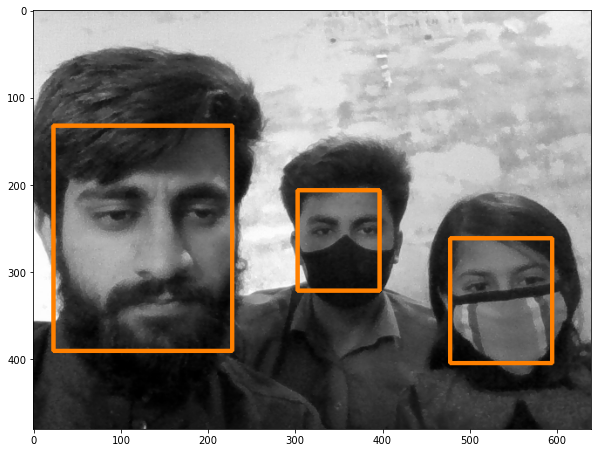

In [264]:
out_image = cv2.cvtColor(framee, cv2.COLOR_BGR2RGB) # input MTCNN is RGB
detections = detector.detect_faces(out_image) # result
faces = [] # list of faces
# draw faces on image
for face in detections:
    faces.append(face['box'])
    x, y, w, h = face['box']
    cv2.rectangle(out_image, (x, y), (x+w, y+h), (255, 128, 0), 4)
# convert list to ndarray
faces = np.array(faces)
plt.figure(figsize=(10, 10))
plt.imshow(out_image)
plt.show()

In [269]:
out_image

array([[[211, 211, 211],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [217, 217, 217],
        [218, 218, 218],
        [227, 227, 227]],

       [[214, 214, 214],
        [214, 214, 214],
        [208, 208, 208],
        ...,
        [220, 220, 220],
        [226, 226, 226],
        [228, 228, 228]],

       [[216, 216, 216],
        [217, 217, 217],
        [210, 210, 210],
        ...,
        [229, 229, 229],
        [232, 232, 232],
        [228, 228, 228]],

       ...,

       [[ 24,  24,  24],
        [ 27,  27,  27],
        [ 27,  27,  27],
        ...,
        [ 41,  41,  41],
        [ 44,  44,  44],
        [ 46,  46,  46]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 25,  25,  25],
        ...,
        [ 41,  41,  41],
        [ 45,  45,  45],
        [ 48,  48,  48]],

       [[ 22,  22,  22],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 40,  40,  40],
        [ 43,  43,  43],
        [ 45,  45,  45]]

In [265]:
TARGET_SIZE = (128, 128)

new_img = cv2.cvtColor(framee, cv2.COLOR_RGB2BGR) #colored output image
classes = []


In [266]:
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = new_img[y:y+h,x:x+w]
    crop = cv2.resize(crop,TARGET_SIZE,TARGET_SIZE)
    crop = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)
    crop = np.reshape(crop,[1,128,128,1])/255.0

    mask_result = model.predict(crop)
    classes.append(mask_result.argmax())
    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,color_label[mask_result.argmax()],2)
    cv2.rectangle(new_img,(x,y),(x+w,y+h),color_label[mask_result.argmax()],1)


[1, 0, 0]


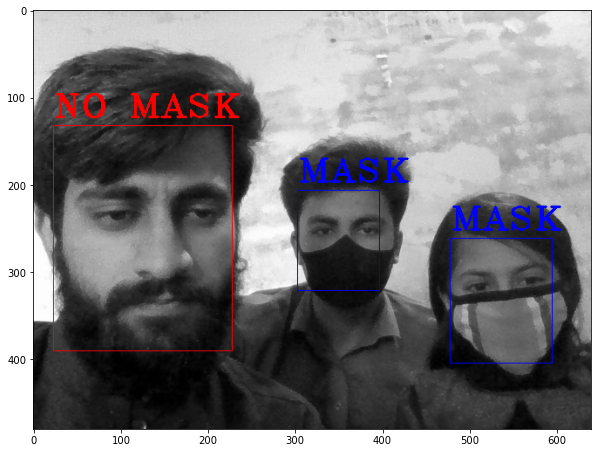

In [267]:
print(classes)
plt.figure(figsize=(10,10))
plt.imshow(new_img)